### <span style= "color :red"> 합성곱신경망 </span>
- 무작위 가중치를 가지는 커널을 이용해 해당 데이터에서 중요한 특성만을 추출하여 특성 맵을 만드는 신경망 알고리즘<br><br>
- 패딩 : 입력 배열의 주위를 가상의 원소로 채우는 것 
    - same : 입력과 특성 맵의 크기를 동일하게 만들기 위해 입력 주위에 0으로 패딩하는 것
    - valid : 순수한 입력 배열에서만 합성곱을 하여 특성 맵을 만드는 경우<br><br>
- 스트라이드 : 커널이 이동하는 크기 (default = 1)

In [5]:
from tensorflow import keras 
Conv = keras.layers.Conv2D(10,                      # 필터의 갯수 
                           kernel_size =(3,3),      # 커널의 크기 
                           activation="relu",       # 활성함수
                           padding = "same",        # 패딩 
                           stride = 1               # 스트라이드 
                           )       

### <span style= "color :red"> 풀링 </span>
- 특성 맵의 갯수는 유지한체 가로세로 크기를 줄이는 역할 
- 가로세로가 같으면 정수하나로, 다른 경우엔 정수의 튜플형태로 매개변수를 지정
- 풀링에는 가중치가 존재하지 않음
- 커널의 영역에서 가장 큰 값을 고르거나 평균값을 계산하는 것 
- 풀링에서는 겹치지 않고 이동한다

In [6]:
pool = keras.layers.MaxPool2D(2)                # 가로세로 크기를 절반으로 줄임 

### <span style= "color :red"> 컬러 이미지를 사용한 합성곱 </span>
- 흑백이미지는 2차원 배열 
    - 커널의 크기 ex = (2, 2)<br><br>
- 컬러이미지는 RGB채널로 구성된 3차원 배열
    - 커널의 크기에 가로,세로,깊이가 필요함 (3,3,3)
    - <span style= "color :blue">중요 : 입력이나 필터의 차원이 몇 개인지 상관없이 항상 출력은 하나의 값이다</span>
    - <span style= "color :blue">(4,4,3) 크기의 입력에 (3,3,3) 크기의 커널을 이용하면 출력된 특성 맵은 (2,2)이다</span><br><br>

- 케라스의 합성곱 층은 항상 3차원 입력을 기대한다 

In [7]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
print(train_input.shape, train_target.shape)


(60000, 28, 28) (60000,)


- 깊이가 있는 이미지 데이터는 위해 데이터 전처리

In [8]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

print(train_scaled.shape, train_target.shape)

(48000, 28, 28, 1) (48000,)


- 합성곱 신경망 만들기

In [21]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,
                              kernel_size=(3,3),
                              activation="relu",
                              padding="same",
                              input_shape= (28,28,1)))
model.add(keras.layers.MaxPool2D(2))                        # (14,14,32)의 특성맵 출력
model.add(keras.layers.Conv2D(64,
                              kernel_size=(3,3),
                              activation="relu",
                              padding="same"))
model.add(keras.layers.MaxPool2D(2))                        # (7,7,64)의 특성맵 출력

model.add(keras.layers.Flatten())                           # (7*7*64)크기의 1차원 배열로 만듬
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation="softmax"))     # 다중분류를 위한 softmax함수 지정

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_4 (Dense)             (None, 100)              

In [22]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics="accuracy")

check_cb = keras.callbacks.ModelCheckpoint("best-cnn-model.h5")
early_stop = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, verbose=1, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.5768 - accuracy: 0.7963 - val_loss: 0.3381 - val_accuracy: 0.8742
Epoch 2/20
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3848 - accuracy: 0.8620 - val_loss: 0.2849 - val_accuracy: 0.8933
Epoch 3/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3308 - accuracy: 0.8802 - val_loss: 0.2715 - val_accuracy: 0.8991
Epoch 4/20
1500/1500 [==============================] - 14s 10ms/step - loss: 0.2986 - accuracy: 0.8920 - val_loss: 0.2625 - val_accuracy: 0.9013
Epoch 5/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2744 - accuracy: 0.9004 - val_loss: 0.2441 - val_accuracy: 0.9107
Epoch 6/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2518 - accuracy: 0.9084 - val_loss: 0.2635 - val_accuracy: 0.9059
Epoch 7/20
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2357 - accuracy: 0.9135 - val_loss: 0.2410 - val

- 훈련 시각화

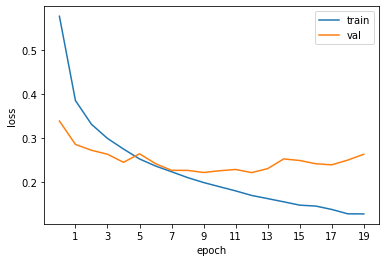

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label="train")
plt.plot(history.history['val_loss'], label = "val")
plt.xticks(range(1,20,2))
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

- 모델 성능 점수

In [29]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2625 - accuracy: 0.9253


[0.262450635433197, 0.9253333210945129]

- 샘플 시각화

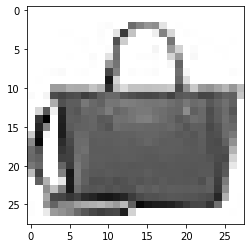

In [32]:
plt.imshow(val_scaled[0], cmap="gray_r")
plt.show()

In [33]:
pred = model.predict(val_scaled[0:1])
pred

1/1 [==============================] - 0s 59ms/step


array([[1.5482364e-34, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]], dtype=float32)

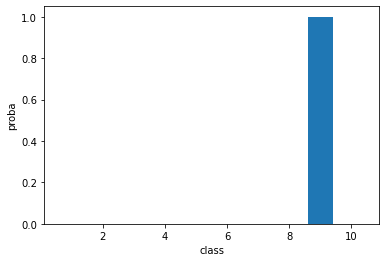

In [35]:
plt.bar(range(1,11), pred[0])
plt.xlabel("class")
plt.ylabel("proba")
plt.show()

In [38]:
import numpy as np
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트','샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']
pred_idx = np.argmax(pred)

print("모델 예측 값 : ",classes[pred_idx])
print("실제 정답 값 : ",classes[val_target[0]])

모델 예측 값 :  가방
실제 정답 값 :  가방


- 모델 테스트 점수

In [41]:
test_scaled = test_input.reshape(-1,28,28,1)/255.0

model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.2998 - accuracy: 0.9193


[0.29984673857688904, 0.9193000197410583]